In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model,metrics
from sklearn.metrics import r2_score

In [2]:
traindata = pd.read_csv("Train.csv",na_values=['',' ','NA'])
testdata = pd.read_csv("Test.csv",na_values=['',' ','NA'])

In [3]:
traindata.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000.0
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000.0
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000.0
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000.0
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000.0


In [4]:
testdata.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07


In [5]:
traindata.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


In [6]:
testdata.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,3.385559,10837.683924,5170.971730,279.483651,1.656335,0.136921,1.793256,11015.183924,4060.355586,1975.443460,1.309605
std,1.364623,526.594771,3581.310989,562.104975,4.456347,1.211945,4.733782,37702.788446,14807.827309,23.707392,0.739623
min,1.000000,10001.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,80.000000,1941.000000,1.000000
25%,2.000000,10310.000000,2373.000000,25.000000,1.000000,0.000000,1.000000,2100.000000,1222.000000,1955.000000,1.000000
50%,3.000000,11105.000000,4772.500000,54.000000,1.000000,0.000000,1.000000,3126.500000,1720.000000,1971.000000,1.000000
75%,5.000000,11361.250000,7106.000000,146.000000,2.000000,0.000000,2.000000,5000.000000,2440.250000,2000.000000,1.000000
max,5.000000,11694.000000,16262.000000,5026.000000,128.000000,50.000000,130.000000,484555.000000,231891.000000,2012.000000,4.000000


In [7]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(traindata)

,Data Type,No of Levels,Levels
PropertyID,object,16810,['PR11101' 'PR11102' 'PR11103' ... 'PR27908' '...
Borough,int64,5,[1 3 2 5 4]
State,object,1,['NY']
Surroundings,object,243,['BATHGATE' 'EAST TREMONT' 'FORDHAM' 'MOUNT HO...
Address,object,15219,['1473 CROTONA PLACE' '453 EAST 181' '511 EAST...
ZipCode,int64,174,[10456 10457 10458 10460 10453 10452 10306 103...
Block,int64,6405,[2927 3037 2912 ... 1496 1576 2065]
Lot,int64,1299,[127 110 155 ... 1171 1528 2249]
BldgClassCategory,object,52,['02 TWO FAMILY DWELLINGS' '03 THREE FAMILY DW...
NoOfResidentialUnits,int64,70,[2 3 4 1 0 70 38 74 16 8 18 20 6 14 5 7 71 37 ...


In [8]:
inspect_data(testdata)

,Data Type,No of Levels,Levels
PropertyID,object,2936,['PR51101' 'PR51102' 'PR51103' ... 'PR54034' '...
Borough,int64,5,[1 3 2 5 4]
State,object,1,['NY']
Surroundings,object,223,['BATHGATE' 'EAST TREMONT' 'FORDHAM' 'NEW DORP...
Address,object,2766,['3860 3 AVENUE' '455 E. 179TH STREET' '4415 3...
ZipCode,int64,164,[10457 10460 10306 10304 10305 10308 10312 112...
Block,int64,2131,[2929 3036 3048 ... 123 149 2095]
Lot,int64,583,[117 65 51 34 40 142 14 140 139 133 5 116 80 4...
BldgClassCategory,object,37,['02 TWO FAMILY HOMES' '02 TWO FAMILY DWELLIN...
NoOfResidentialUnits,int64,24,[2 4 0 3 1 6 8 109 7 11 15 80 90 9 13 46 55 71...


In [9]:
print(traindata.shape)
print(testdata.shape)

(16810, 19)
(2936, 18)


## data preprocessing and feature engineering

In [10]:
from datetime import datetime

In [11]:
# converting 'DateOfEvaluation' to datetime to extract the year
traindata['DateOfEvaluation'] = pd.to_datetime(traindata['DateOfEvaluation'])
testdata['DateOfEvaluation'] = pd.to_datetime(testdata['DateOfEvaluation'])

In [12]:
traindata['yearOfEval'] = traindata['DateOfEvaluation'].dt.year
testdata['yearOfEval'] = testdata['DateOfEvaluation'].dt.year

In [13]:
# Creating a new column 'age' of the property
traindata['age']= traindata['yearOfEval']-traindata['YearOfConstruction']
testdata['age']= testdata['yearOfEval']-testdata['YearOfConstruction']

In [14]:
inspect_data(traindata)

,Data Type,No of Levels,Levels
PropertyID,object,16810,['PR11101' 'PR11102' 'PR11103' ... 'PR27908' '...
Borough,int64,5,[1 3 2 5 4]
State,object,1,['NY']
Surroundings,object,243,['BATHGATE' 'EAST TREMONT' 'FORDHAM' 'MOUNT HO...
Address,object,15219,['1473 CROTONA PLACE' '453 EAST 181' '511 EAST...
ZipCode,int64,174,[10456 10457 10458 10460 10453 10452 10306 103...
Block,int64,6405,[2927 3037 2912 ... 1496 1576 2065]
Lot,int64,1299,[127 110 155 ... 1171 1528 2249]
BldgClassCategory,object,52,['02 TWO FAMILY DWELLINGS' '03 THREE FAMILY DW...
NoOfResidentialUnits,int64,70,[2 3 4 1 0 70 38 74 16 8 18 20 6 14 5 7 71 37 ...


In [15]:
# dropping 'DateOfEvaluation','YearOfConstruction','yearOfEval' since the age of the property has been calculated
# dropping 'state' as there is only one throughout the data
# address doesn't seem important because we have Borough and zipcode for market value calculation
# residential units and commercial units will be given different values, hence totalunits not required
# building class and category is already mentioned in 'TaxClass_AtEvaluationTime'
# newyork address is generally represented as borough,block,lot. since lots are too specific to the place it wouldnt make much difference 
traindata.drop(['DateOfEvaluation','YearOfConstruction','yearOfEval','State','Address','TotalNoOfUnits','BldgClassCategory','Lot'],axis=1,inplace=True)
testdata.drop(['DateOfEvaluation','YearOfConstruction','yearOfEval','State','Address','TotalNoOfUnits','BldgClassCategory','Lot'],axis=1,inplace=True)

In [16]:
traindata.isnull().sum()

PropertyID                    0
Borough                       0
Surroundings                  0
ZipCode                       0
Block                         0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
LandAreaInSqFt                0
GrossAreaInSqFt               0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
PropertyEvaluationvalue       0
age                           0
dtype: int64

In [17]:
testdata.isna().sum()

PropertyID                    0
Borough                       0
Surroundings                  0
ZipCode                       0
Block                         0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
LandAreaInSqFt                0
GrossAreaInSqFt               0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
age                           0
dtype: int64

In [18]:
print((traindata == 0).sum())

PropertyID                        0
Borough                           0
Surroundings                      0
ZipCode                           0
Block                             0
NoOfResidentialUnits            802
NoOfCommercialUnits           15790
LandAreaInSqFt                    0
GrossAreaInSqFt                   0
TaxClass_AtEvaluationTime         0
BldgClass_AtEvaluationTime        0
PropertyEvaluationvalue           0
age                              79
dtype: int64


In [19]:
print((testdata == 0).sum())

PropertyID                       0
Borough                          0
Surroundings                     0
ZipCode                          0
Block                            0
NoOfResidentialUnits           155
NoOfCommercialUnits           2750
LandAreaInSqFt                   0
GrossAreaInSqFt                  0
TaxClass_AtEvaluationTime        0
BldgClass_AtEvaluationTime       0
age                             14
dtype: int64


In [20]:
# as there are 0 values in age and property assessment is usually done on buildings of atleast 1 year of age
traindata= traindata[traindata['age']!=0]
traindata.shape

(16731, 13)

In [21]:
testdata= testdata[testdata['age']!=0]
testdata.shape

(2922, 12)

In [22]:
(traindata['LandAreaInSqFt']<traindata['GrossAreaInSqFt']).sum()

3485

In [23]:
(traindata['LandAreaInSqFt']>traindata['GrossAreaInSqFt']).sum()

12968

In [24]:
(traindata['LandAreaInSqFt']==traindata['GrossAreaInSqFt']).sum()

278

In [25]:
# taking the maximum of 2 as building area for calculating market value
traindata['bldg_area']=traindata[["LandAreaInSqFt", "GrossAreaInSqFt"]].max(axis=1)
testdata['bldg_area']=testdata[["LandAreaInSqFt", "GrossAreaInSqFt"]].max(axis=1)

In [26]:
traindata.drop(["LandAreaInSqFt", "GrossAreaInSqFt"],axis=1,inplace=True)
testdata.drop(["LandAreaInSqFt", "GrossAreaInSqFt"],axis=1,inplace=True)

In [27]:
print(traindata.shape)
print(testdata.shape)

(16731, 12)
(2922, 11)


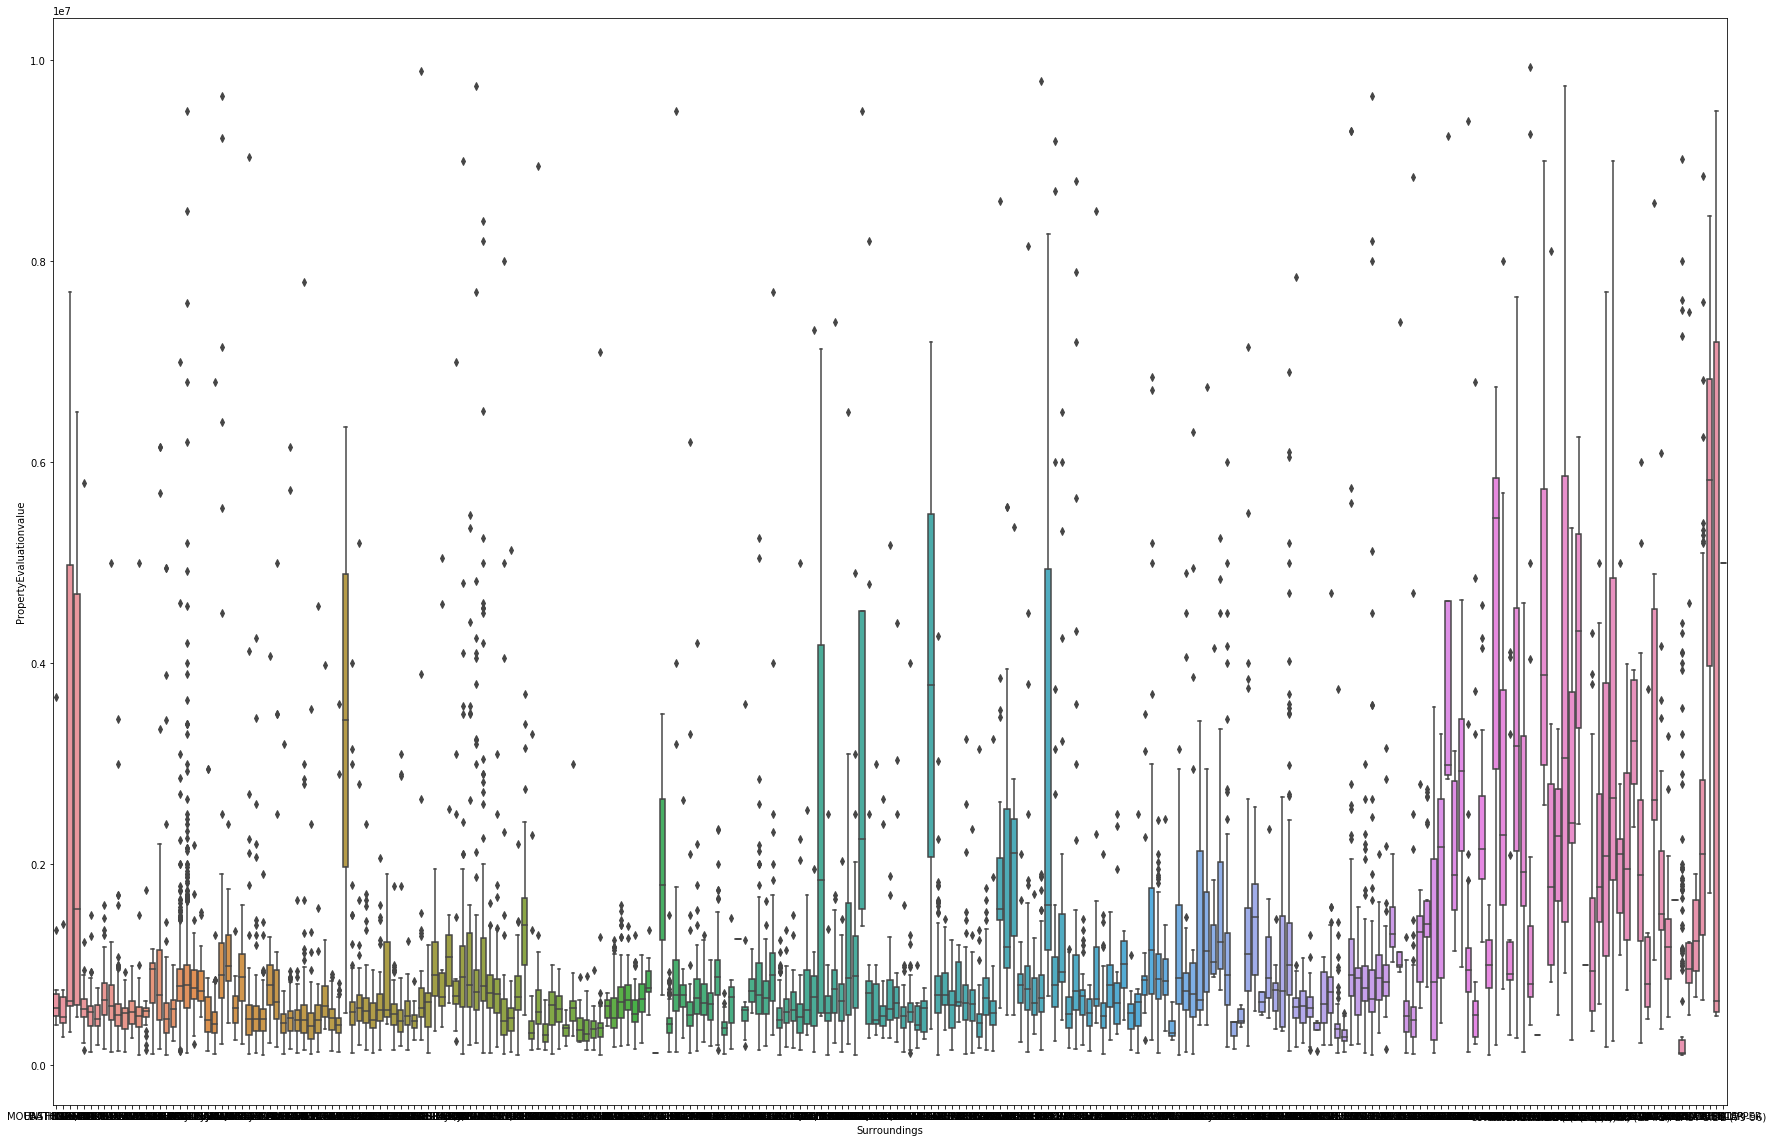

In [28]:
import seaborn as sns
#Unnderstand the relation between Categorical Variables and Target Price¶
# Relatoinship with Caregorical Features
var = 'Surroundings'
data = pd.concat([traindata['PropertyEvaluationvalue'], traindata[var]],axis=1)
f, ax = plt.subplots(figsize=(30,20))
fig = sns.boxplot(x=var, y='PropertyEvaluationvalue',data=data)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


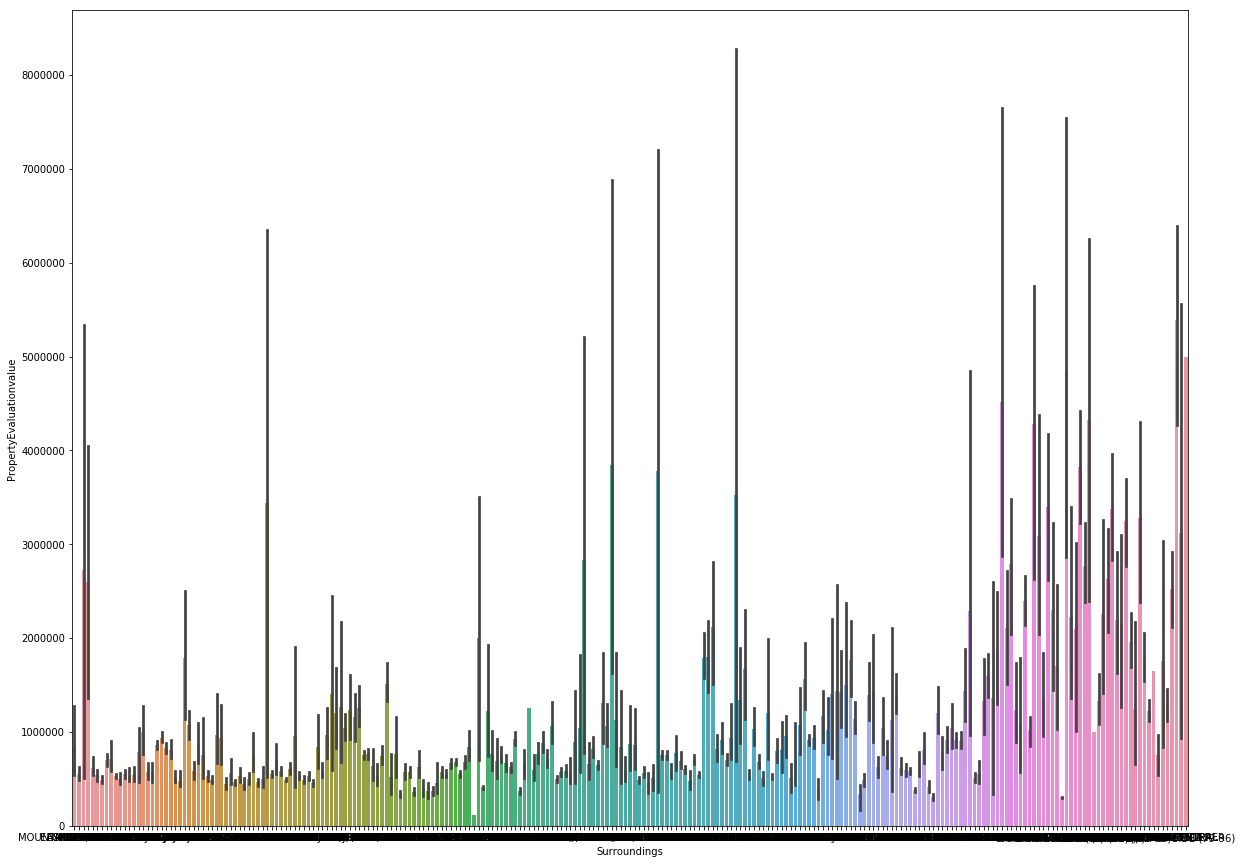

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
#seaborn way sns.barplot(x,y,data=)
sns.barplot(x='Surroundings',y='PropertyEvaluationvalue',data=traindata)
plt.show()


In [30]:
# type conversion to category
traindata['Borough'] = traindata['Borough'].astype('category')
traindata['ZipCode'] = traindata['ZipCode'].astype('category')
traindata['Surroundings'] = traindata['Surroundings'].astype('category')
traindata['BldgClass_AtEvaluationTime'] = traindata['BldgClass_AtEvaluationTime'].astype('category')

In [31]:
testdata['Borough'] = testdata['Borough'].astype('category')
testdata['ZipCode'] = testdata['ZipCode'].astype('category')
testdata['Surroundings'] = testdata['Surroundings'].astype('category')
testdata['BldgClass_AtEvaluationTime'] = testdata['BldgClass_AtEvaluationTime'].astype('category')

In [32]:
# dropping PropertyID from text and train
traindata.drop('PropertyID',axis=1,inplace=True)
testdata1= testdata.drop('PropertyID',axis=1)

In [33]:
testdata1.columns

Index(['Borough', 'Surroundings', 'ZipCode', 'Block', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'age', 'bldg_area'],
      dtype='object')

In [34]:
inspect_data(traindata)

,Data Type,No of Levels,Levels
Borough,category,5,"[1, 3, 2, 5, 4]\nCategories (5, int64): [1, 3,..."
Surroundings,category,243,"[BATHGATE, EAST TREMONT, FORDHAM, MOUNT HOPE/M..."
ZipCode,category,174,"[10456, 10457, 10458, 10460, 10453, ..., 10128..."
Block,int64,6396,[2927 3037 2912 ... 1496 1576 2065]
NoOfResidentialUnits,int64,69,[ 2 3 4 1 0 70 38 74 16 8 18 ...
NoOfCommercialUnits,int64,18,[ 0 1 4 8 7 3 6 2 5 11 10 2...
TaxClass_AtEvaluationTime,int64,3,[1 2 4]
BldgClass_AtEvaluationTime,category,100,"[B1, C0, S4, A5, C3, ..., M3, M9, I1, R8, RH]\..."
PropertyEvaluationvalue,float64,3673,[ 540000. 750000. 470000. ... 7600000. 80750...
age,int64,74,[24 12 25 23 22 8 21 7 17 18 33 16 15 13 45 ...


In [35]:
# seperating numerical and categorical variables
num_cols = traindata.select_dtypes(exclude='category').columns.tolist()
cat_cols = traindata.select_dtypes(include='category').columns.tolist() 
# or cat_cols = bank_train.columns.difference(num_cols).tolist()

print("Numeric Columns ->", num_cols)
print("Categorical Columns ->", cat_cols)

Numeric Columns -> ['Block', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TaxClass_AtEvaluationTime', 'PropertyEvaluationvalue', 'age', 'bldg_area']
Categorical Columns -> ['Borough', 'Surroundings', 'ZipCode', 'BldgClass_AtEvaluationTime']


In [36]:
num_cols = testdata1.select_dtypes(exclude='category').columns.tolist()
cat_cols = testdata1.select_dtypes(include='category').columns.tolist() 
# or cat_cols = bank_train.columns.difference(num_cols).tolist()

print("Numeric Columns ->", num_cols)
print("Categorical Columns ->", cat_cols)

Numeric Columns -> ['Block', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TaxClass_AtEvaluationTime', 'age', 'bldg_area']
Categorical Columns -> ['Borough', 'Surroundings', 'ZipCode', 'BldgClass_AtEvaluationTime']


In [37]:
traindata.shape

(16731, 11)

In [38]:
testdata1.shape

(2922, 10)

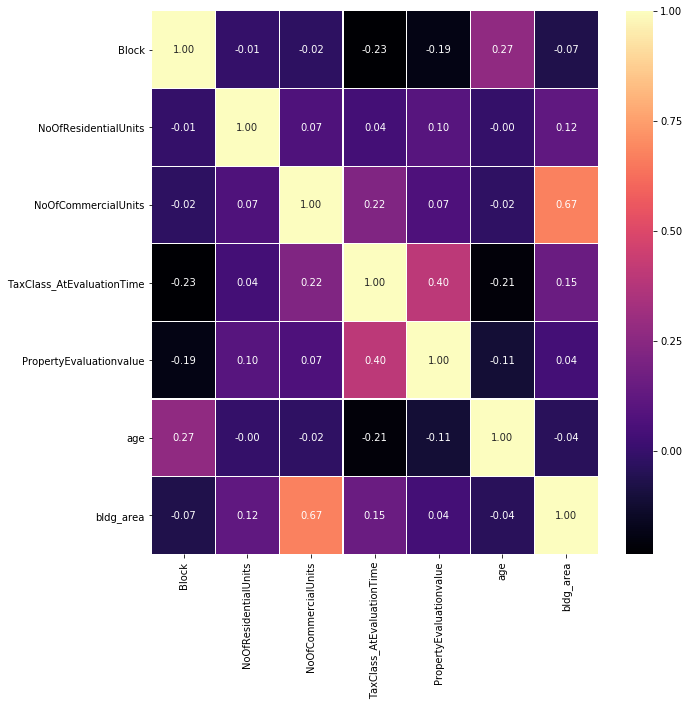

In [39]:
#correlation amoung numerical variables
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(traindata.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

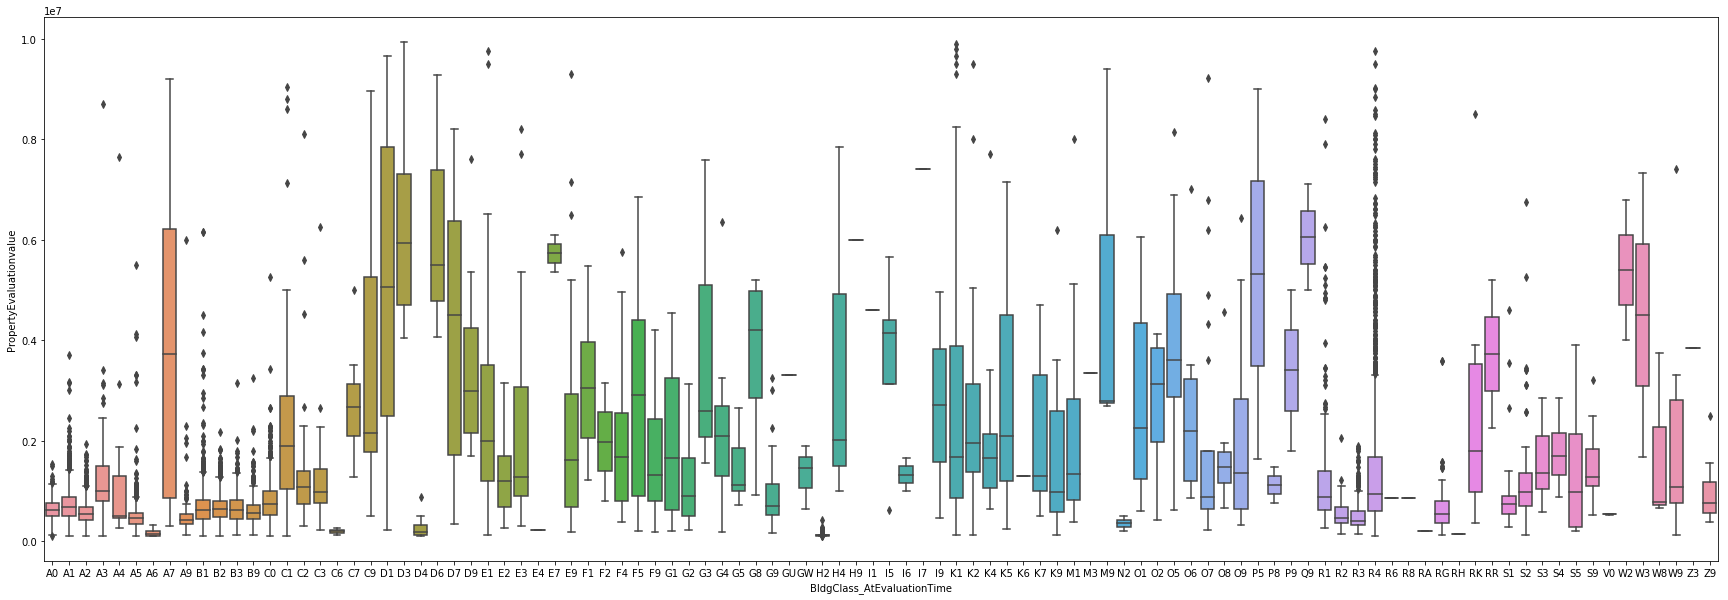

In [40]:
var = 'BldgClass_AtEvaluationTime'
data = pd.concat([traindata['PropertyEvaluationvalue'], traindata[var]],axis=1)
f, ax = plt.subplots(figsize=(30,10))
fig = sns.boxplot(x=var, y='PropertyEvaluationvalue',data=data)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tejasvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


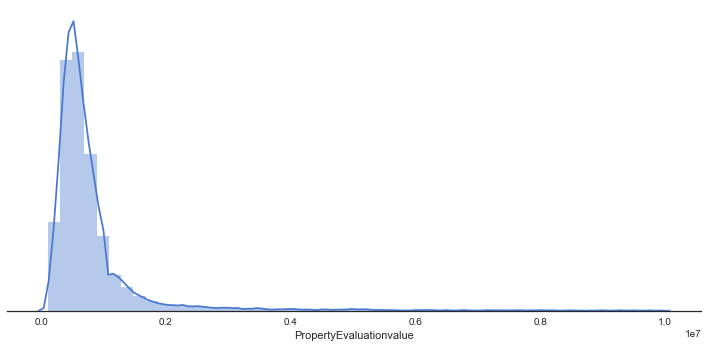

In [41]:
#target distribution
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
sns.despine(left=True)
sns.distplot(traindata['PropertyEvaluationvalue'], bins = 50, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [42]:
traindata.describe()

,Block,NoOfResidentialUnits,NoOfCommercialUnits,TaxClass_AtEvaluationTime,PropertyEvaluationvalue,age,bldg_area
count,16731.000000,16731.000000,16731.000000,16731.000000,1.673100e+04,16731.000000,1.673100e+04
mean,5428.044947,1.853864,0.138007,1.290299,8.088865e+05,39.795649,1.233387e+04
std,3710.729043,8.010266,2.190649,0.714507,8.990864e+05,23.529898,5.962623e+04
min,6.000000,0.000000,0.000000,1.000000,1.000440e+05,1.000000,1.450000e+02
25%,2401.000000,1.000000,0.000000,1.000000,4.250000e+05,16.000000,2.400000e+03
50%,5051.000000,1.000000,0.000000,1.000000,5.900000e+05,46.000000,3.552000e+03
75%,7377.500000,2.000000,0.000000,1.000000,8.450735e+05,62.000000,5.000000e+03
max,16314.000000,437.000000,252.000000,4.000000,9.935000e+06,74.000000,5.612000e+06


In [44]:
traindata.columns

Index(['Borough', 'Surroundings', 'ZipCode', 'Block', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'PropertyEvaluationvalue', 'age',
       'bldg_area'],
      dtype='object')

C:\Users\Tejasvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tejasvi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tejasvi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


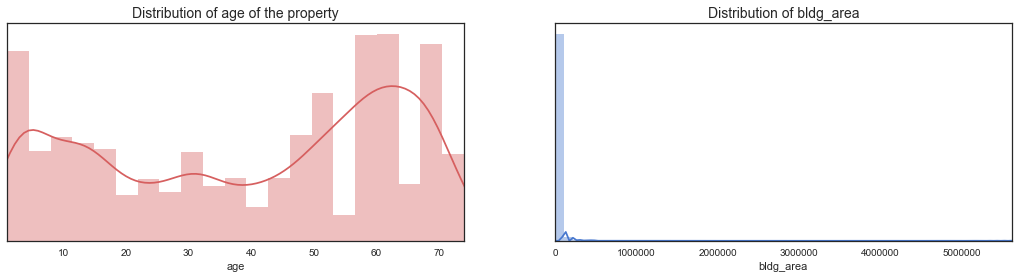

In [45]:
#%matplotlib inline
fig, ax = plt.subplots(ncols=2, figsize=(18,4))

age = traindata['age'].values
area = traindata['bldg_area'].values

sns.distplot(traindata['age'], ax=ax[0], color='r')
ax[0].set_title('Distribution of age of the property', fontsize=14)
ax[0].set_xlim([min(age), max(age)])
plt.setp(ax[0], yticks=[])

sns.distplot(traindata['bldg_area'], ax=ax[1], color='b')
ax[1].set_title('Distribution of bldg_area', fontsize=14)
ax[1].set_xlim([min(area), max(area)])
plt.setp(ax[1], yticks=[])

plt.show()

Text(0.5,0,'Frequency')

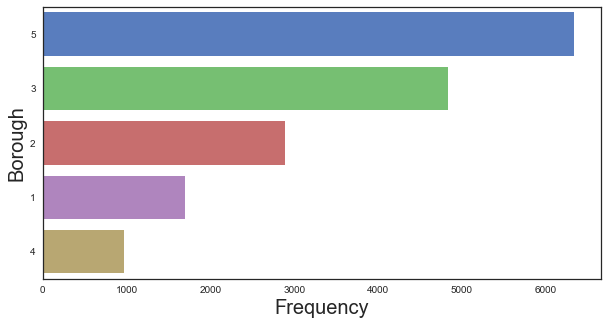

In [46]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(y = traindata.Borough, \
              order = traindata.Borough.value_counts().iloc[:].index, \
                                                      orient = 'v')

plt.ylabel('Borough', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)

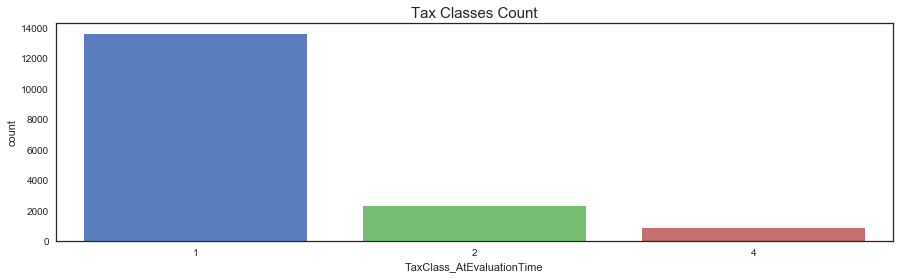

In [47]:
fig, ax = plt.subplots(figsize=(15,4))

sns.countplot(x = traindata.TaxClass_AtEvaluationTime, \
              order = traindata.TaxClass_AtEvaluationTime.value_counts().iloc[:].index, \
                                                      orient = 'v',ax=ax)
ax.set_title('Tax Classes Count', fontsize = 15)

plt.show()

In [48]:
# decoupling target variable
y = traindata['PropertyEvaluationvalue']
X = traindata.drop(['PropertyEvaluationvalue'],axis=1)

In [49]:
# dummifying
X_dumm = pd.get_dummies(X,drop_first=True)

In [50]:
X_dumm.head()

,Block,NoOfResidentialUnits,NoOfCommercialUnits,TaxClass_AtEvaluationTime,age,bldg_area,Borough_2,Borough_3,Borough_4,Borough_5,...,BldgClass_AtEvaluationTime_S4,BldgClass_AtEvaluationTime_S5,BldgClass_AtEvaluationTime_S9,BldgClass_AtEvaluationTime_V0,BldgClass_AtEvaluationTime_W2,BldgClass_AtEvaluationTime_W3,BldgClass_AtEvaluationTime_W8,BldgClass_AtEvaluationTime_W9,BldgClass_AtEvaluationTime_Z3,BldgClass_AtEvaluationTime_Z9
0,2927,2,0,1,24,2394,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3037,3,0,1,12,3037,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2912,2,0,1,25,2400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2929,2,0,1,23,2394,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3036,2,0,1,22,3346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
testdata1 = pd.get_dummies(testdata1,drop_first=True)

In [52]:
testdata1.head()

,Block,NoOfResidentialUnits,NoOfCommercialUnits,TaxClass_AtEvaluationTime,age,bldg_area,Borough_2,Borough_3,Borough_4,Borough_5,...,BldgClass_AtEvaluationTime_RK,BldgClass_AtEvaluationTime_S1,BldgClass_AtEvaluationTime_S2,BldgClass_AtEvaluationTime_S3,BldgClass_AtEvaluationTime_S4,BldgClass_AtEvaluationTime_S9,BldgClass_AtEvaluationTime_W8,BldgClass_AtEvaluationTime_W9,BldgClass_AtEvaluationTime_Z2,BldgClass_AtEvaluationTime_Z9
0,2929,2,0,1,18,2498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3036,2,0,1,20,2340,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3048,4,1,2,52,6000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2899,0,1,4,64,3439,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3083,3,0,1,17,2931,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# aligning train and test data for equal no. of columns
X_train, testdata1 = X_dumm.align(testdata1, join='outer', axis=1, fill_value=0)
print(X_train.shape)
print(testdata1.shape)

(16731, 528)
(2922, 528)


In [54]:
pd.DataFrame({"Train":X_train.isnull().sum(),"Test":testdata1.isnull().sum()})

,Train,Test
BldgClass_AtEvaluationTime_A1,0,0
BldgClass_AtEvaluationTime_A2,0,0
BldgClass_AtEvaluationTime_A3,0,0
BldgClass_AtEvaluationTime_A4,0,0
BldgClass_AtEvaluationTime_A5,0,0
BldgClass_AtEvaluationTime_A6,0,0
BldgClass_AtEvaluationTime_A7,0,0
BldgClass_AtEvaluationTime_A9,0,0
BldgClass_AtEvaluationTime_B1,0,0
BldgClass_AtEvaluationTime_B2,0,0


In [55]:
## Split the data into X_train, X_valid, y_train, y_valid with test_size = 0.20 using sklearn
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.20,random_state=1234)

In [56]:
## Print the shape of X_train, X_valid, y_train, y_valid
print(" X_train :" , X_train.shape)
print(" X_valid :" , X_valid.shape)
print(" y_train :" , y_train.shape)
print(" y_valid :" , y_valid.shape)

 X_train : (13384, 528)
 X_valid : (3347, 528)
 y_train : (13384,)
 y_valid : (3347,)


In [57]:
def compare_train_test(train_data, test_data):
    train_levels = train_data.apply(lambda x: set(x.unique()),axis=0)
    test_levels = test_data.apply(lambda x: set(x.unique()),axis=0)
    extra = []
    missing = []
    for x1,x2 in zip(train_levels, test_levels):
        missing.append(x1-x2)
        extra.append(x2-x1)
    
    return pd.DataFrame({"Train Data Type":train_data.dtypes, "Test Data Type":test_data.dtypes,
                         "Train #Levels":train_data.apply(lambda x: x.unique().shape[0],axis=0), "Test #Levels":test_data.apply(lambda x: x.unique().shape[0],axis=0),
                         "Test Missing":missing, "Test Extra":extra})
compare_train_test(X_train, X_valid)

,Train Data Type,Test Data Type,Train #Levels,Test #Levels,Test Missing,Test Extra
BldgClass_AtEvaluationTime_A1,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_A2,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_A3,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_A4,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_A5,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_A6,uint8,uint8,2,1,{1},{}
BldgClass_AtEvaluationTime_A7,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_A9,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_B1,uint8,uint8,2,2,{},{}
BldgClass_AtEvaluationTime_B2,uint8,uint8,2,2,{},{}


## Linear Regression model

In [58]:
lm = linear_model.LinearRegression()
lm_model= lm.fit(X_train,y_train)

In [59]:
print('Intercept   :', lm_model.intercept_)
print('\n','*'*100)
print('Shape of Coefficients: \n', lm_model.coef_.shape)
print('\n','*'*100)
print('Coefficients: \n', lm_model.coef_)

Intercept   : 10120278247.221529

 ****************************************************************************************************
Shape of Coefficients: 
 (528,)

 ****************************************************************************************************
Coefficients: 
 [ 1.20584775e+05 -1.27828051e+04  4.28995049e+05  6.32681046e+05
 -8.51697045e+04 -3.12872956e+05  3.65948422e+06 -5.83911473e+04
  4.84556473e+04  1.08323502e+05  6.19636187e+04  8.85327326e+02
  1.04026289e+05  1.01581076e+10  1.01571621e+10  1.01569430e+10
 -1.96423290e+13  1.01547020e+10  1.01586788e+10  1.01576301e+10
  1.01599299e+10  1.01625289e+10  1.01542596e+10  1.01621082e+10
  1.01590791e+10  1.01584158e+10  3.04719017e+10  3.04708072e+10
  3.04717451e+10  3.04689995e+10  3.04738582e+10  3.04710322e+10
  3.04724619e+10  3.04727451e+10  3.04713458e+10  3.04717223e+10
  3.04707080e+10  3.04714919e+10  3.04705722e+10  3.04719372e+10
  3.04714962e+10  3.04703523e+10  3.04729074e+10  3.04704357e+1

In [62]:
print ("R^2 is: \n", lm_model.score(X_train, y_train))
print ("R^2 is: \n", lm_model.score(X_valid, y_valid))

R^2 is: 
 0.5993578837281404
R^2 is: 
 -1183234.83752419


In [243]:
pred_train= lm.predict(X_train)
pred_valid = lm.predict(X_valid)

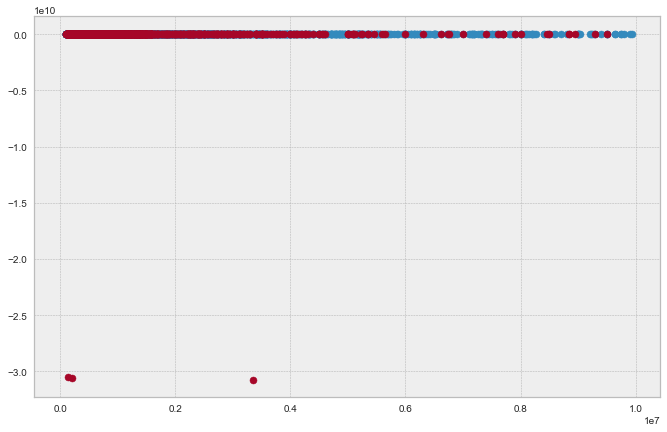

In [248]:
from matplotlib import style
style.use("bmh")
plt.figure(figsize=(10,7))
plt.scatter(y_train,pred_train)
plt.scatter(y_valid,pred_valid)
plt.show()

Text(0,0.5,'Residuals')

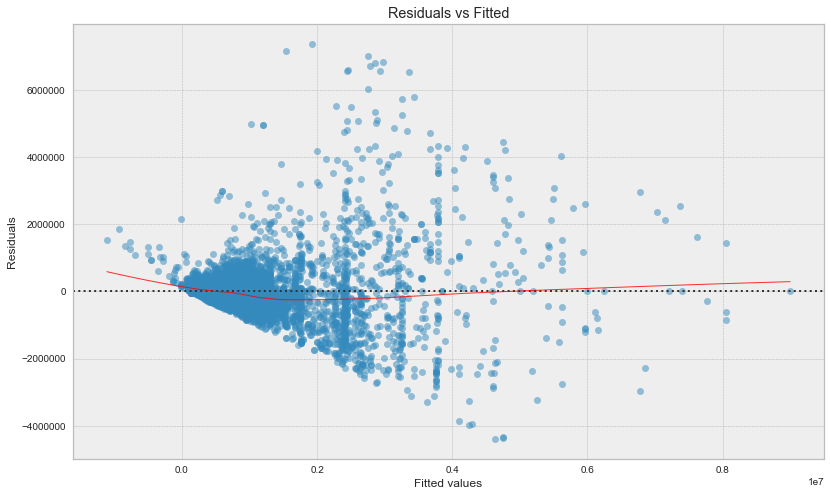

In [249]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(pred_train, y_train, data=traindata, dropna=True,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

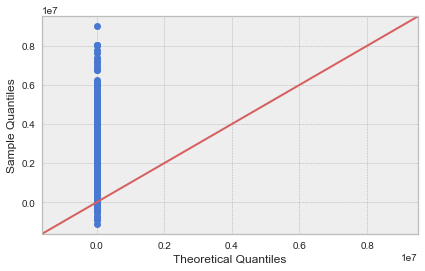

In [250]:
import numpy as np
import statsmodels.api as sm
import pylab

test = np.random.normal(20, 5, 1000)

sm.qqplot(pred_train, loc = 20, scale = 5 ,  line='45')
pylab.show()

In [251]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [252]:
print(mean_absolute_percentage_error(y_train,pred_train))
print(mean_absolute_percentage_error(y_valid,pred_valid))

41.79358250022901
11402.395290460758


## standardising 

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])


In [254]:
testdata1[num_cols] =scaler.transform(testdata1[num_cols])

## Regularisation Models

In [255]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
Linear_lasso = Lasso()
Linear_ridge = Ridge()
Linear_elasticnet = ElasticNet()


In [256]:
print("Linear Lasso:" , Linear_lasso)
print("Linear Ridge:" , Linear_ridge)
print("Linear Elastic Net:" , Linear_elasticnet)

Linear Lasso: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Linear Ridge: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Linear Elastic Net: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [257]:
# Fit a model on all 3 regressions
Linear_lasso.fit(X_train,y_train)
Linear_ridge.fit(X_train,y_train)
Linear_elasticnet.fit(X_train,y_train)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [258]:
lasso_pred=Linear_lasso.predict(X_train)
ridge_pred=Linear_ridge.predict(X_train)
elas_pred=Linear_elasticnet.predict(X_train)

In [259]:
lasso_valid=Linear_lasso.predict(X_valid)
ridge_valid=Linear_ridge.predict(X_valid)
elas_valid=Linear_elasticnet.predict(X_valid)

In [260]:
print('lasso')
print(mean_absolute_percentage_error(y_train,lasso_pred))
print(mean_absolute_percentage_error(y_valid,lasso_valid))

lasso
41.80552031709872
47.22512356697186


In [261]:
print('ridge')
print(mean_absolute_percentage_error(y_train,ridge_pred))
print(mean_absolute_percentage_error(y_valid,ridge_valid))

ridge
42.37994433951095
47.42108970224613


In [262]:
print('elas')
print(mean_absolute_percentage_error(y_train,elas_pred))
print(mean_absolute_percentage_error(y_valid,elas_valid))

elas
72.05868790727465
69.26738580977339


In [263]:
from sklearn.grid_search import GridSearchCV

In [264]:
para_grid = {
      'alpha' : [i for i in range(1,10)], #Alpha decides degree of penalization
     }

In [267]:
from sklearn.model_selection import GridSearchCV

las = Lasso()
clf = GridSearchCV(estimator=las, param_grid=para_grid, cv=5)
clf.fit(X_train, y_train)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want t

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [268]:
clf.best_estimator_

Lasso(alpha=9, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [269]:
tr=clf.predict(X_train)
va=clf.predict(X_valid)

In [270]:
print('lasso')
print(mean_absolute_percentage_error(y_train,tr))
print(mean_absolute_percentage_error(y_valid,va))

lasso
41.794624789978506
47.762774733124765


## Random forest

In [271]:
from sklearn.ensemble import RandomForestRegressor
# Model initilization
rfr_10 = RandomForestRegressor(n_estimators=10, max_depth=10,random_state=1234)
# Model training
rfr_10.fit(X_train,y_train)
# Model predictions
rfr10_train_pred = rfr_10.predict(X_train)
rfr10_test_pred = rfr_10.predict(X_valid)

In [272]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = rfr_10.score(X_train,y_train)
model_score1 = rfr_10.score(X_valid,y_valid)
# Explained variance score: 1 is perfect prediction
print('Train Accuracy.: ',model_score)
print('Test Accuracy.: ',model_score1)

Train Accuracy.:  0.7120835061979383
Test Accuracy.:  0.5857453753820832


In [273]:
print(mean_absolute_percentage_error(y_train,rfr10_train_pred))
print(mean_absolute_percentage_error(y_valid,rfr10_test_pred))

39.75609652240958
45.04585126105861


In [274]:
preds1=rfr_10.predict(testdata1)

In [275]:
from sklearn.model_selection import RandomizedSearchCV

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfr_grid = RandomForestRegressor(n_jobs=-1, max_features='sqrt')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"
# First set of search
param_grid = {"n_estimators" : [100,150,200,250,300],
          "max_depth" : [10,20,30,40,50],
           "min_samples_leaf" : [5,6,7,8,9,10,11,12,13,14,15]}
# Second set of search
#param_grid = {"n_estimators" : [150,160,170,180,190],
       #    "max_depth" : [5,6,7,8,9,10,11,12,13,14,15],
        #   "min_samples_leaf" : [5,6,7,8,9,10,11,12,13,14,15]}
rfr_cv_grid = RandomizedSearchCV(estimator = rfr_grid, param_distributions = param_grid, cv = 10, n_iter=10)


In [276]:
rfr_cv_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [277]:
rfr_cv_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [278]:
model_score = rfr_cv_grid.best_estimator_.score(X_train,y_train)
model_score1 = rfr_cv_grid.best_estimator_.score(X_valid,y_valid)
print('Train Accuracy.: ',model_score)
print('Test Accuracy.: ',model_score1)

Train Accuracy.:  0.5214203059696254
Test Accuracy.:  0.49514380353686716


In [279]:
cv_train=rfr_cv_grid.predict(X_train)
cv_test= rfr_cv_grid.predict(X_valid)

In [280]:
print(mean_absolute_percentage_error(y_train,cv_train))
print(mean_absolute_percentage_error(y_valid,cv_test))

46.704107780044026
49.071460907992446


## xgboost

In [281]:
import xgboost as xgb

In [282]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_valid, label=y_valid)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [283]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.2,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [284]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_train)
preds_test = xg_reg.predict(X_valid)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [285]:
print(mean_absolute_percentage_error(y_train,preds))
print(mean_absolute_percentage_error(y_valid,preds_test))

42.81490651405308
44.60750538697316


In [286]:
preds=xg_reg.predict(testdata1)

## Feature Importance

Text(0.5,0,'Relative Importance')

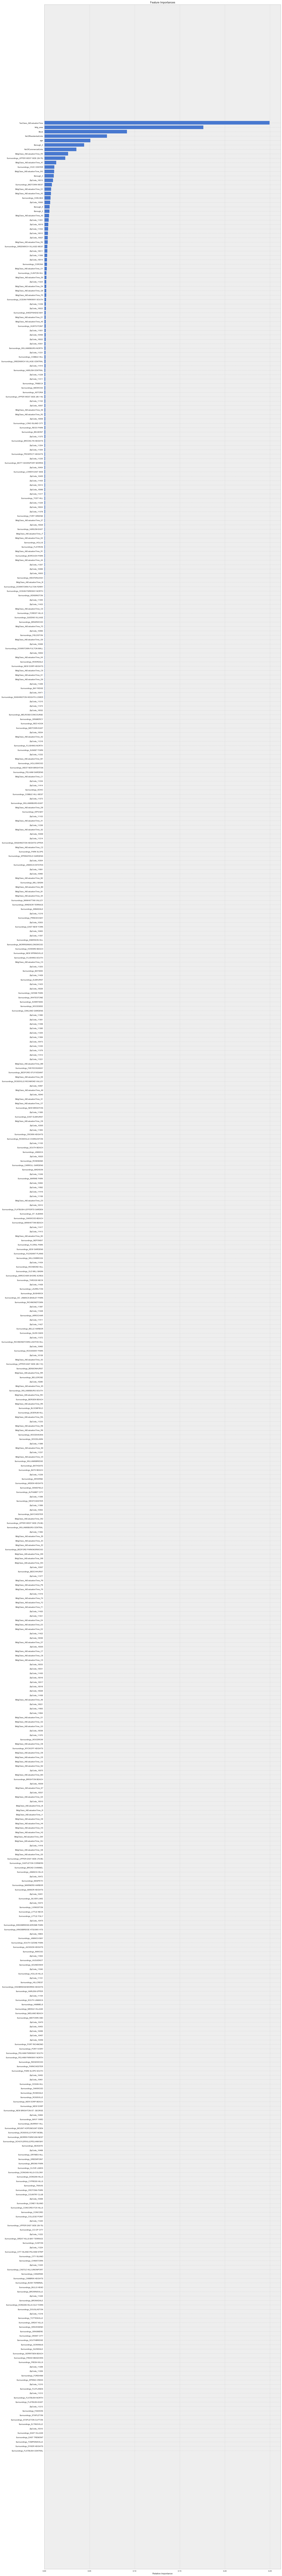

In [287]:
# from random forest
plt.figure(figsize=(20,250))
features=X_train.columns
importances = rfr_10.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [288]:
final1= pd.DataFrame({'PropertyID': testdata['PropertyID'], 'preds': preds1})

In [289]:
final1.to_csv('final2.csv',index=False)